Steps:
- EDA
- Feature Engineering (missing values, outliers, encoding, scaling)
- Feature Selection

In [105]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

In [106]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = pd.concat([train, test], axis=0)

In [107]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [109]:
df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1, inplace=True)
#Too much missing values and Id is unnecessary feature

# EDA

In [110]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [111]:
for i in df.columns:
    print(i + ' - ' +str(df[i].dtype) + ': ' + str(df[i].nunique()))

MSSubClass - int64: 16
MSZoning - object: 5
LotFrontage - float64: 128
LotArea - int64: 1951
Street - object: 2
LotShape - object: 4
LandContour - object: 4
Utilities - object: 2
LotConfig - object: 5
LandSlope - object: 3
Neighborhood - object: 25
Condition1 - object: 9
Condition2 - object: 8
BldgType - object: 5
HouseStyle - object: 8
OverallQual - int64: 10
OverallCond - int64: 9
YearBuilt - int64: 118
YearRemodAdd - int64: 61
RoofStyle - object: 6
RoofMatl - object: 8
Exterior1st - object: 15
Exterior2nd - object: 16
MasVnrType - object: 4
MasVnrArea - float64: 444
ExterQual - object: 4
ExterCond - object: 5
Foundation - object: 6
BsmtQual - object: 4
BsmtCond - object: 4
BsmtExposure - object: 4
BsmtFinType1 - object: 6
BsmtFinSF1 - float64: 991
BsmtFinType2 - object: 6
BsmtFinSF2 - float64: 272
BsmtUnfSF - float64: 1135
TotalBsmtSF - float64: 1058
Heating - object: 6
HeatingQC - object: 5
CentralAir - object: 2
Electrical - object: 5
1stFlrSF - int64: 1083
2ndFlrSF - int64: 635
L

In [112]:
categorical_col = []
numerical_col = []
year_col = []

for i in df.columns:
    if 'Yr' in i or 'Year' in i:
        year_col.append(i)
    else:
        if df[i].dtype != 'O':
            numerical_col.append(i)
        else:
            categorical_col.append(i)

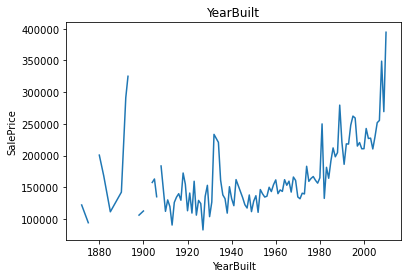

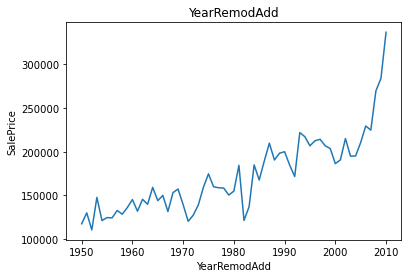

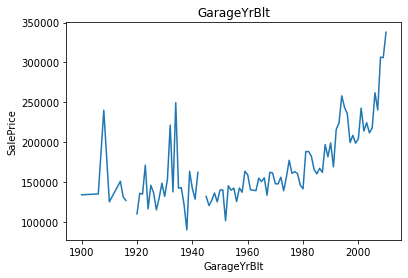

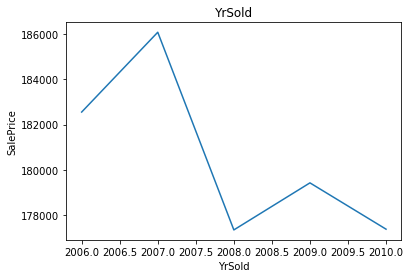

In [113]:
for i in year_col:
    plt.plot(df.groupby(i).mean('SalePrice').index, df.groupby(i).mean('SalePrice')['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)
    plt.show()

As graphs show, YearBuilt and GarageYrBlt are highly correlated, so one of them must be deleted

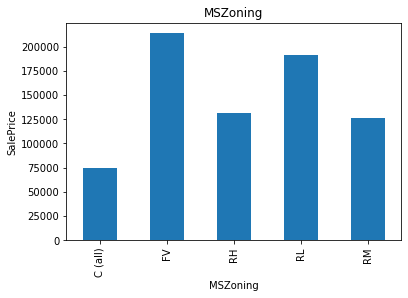

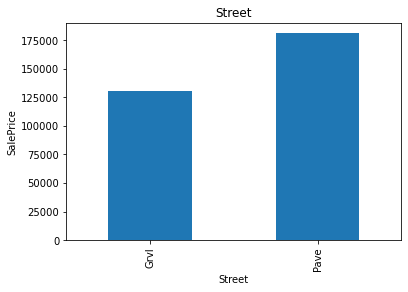

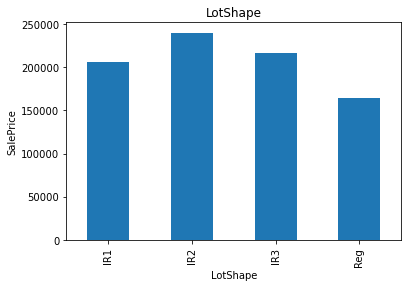

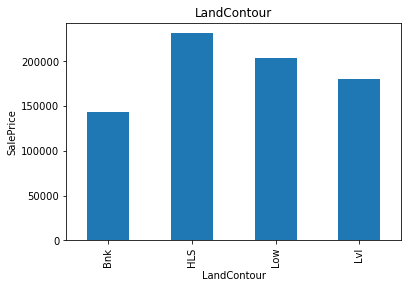

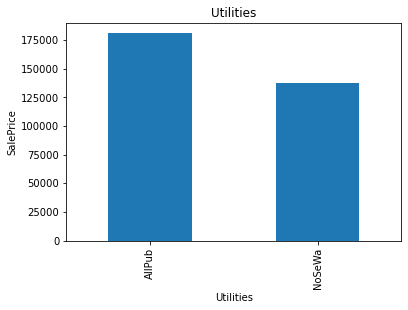

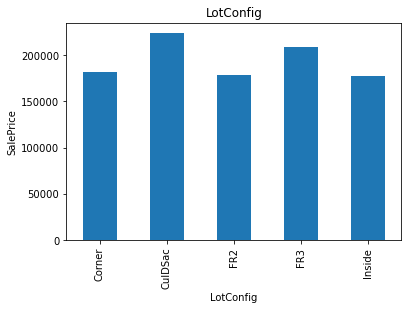

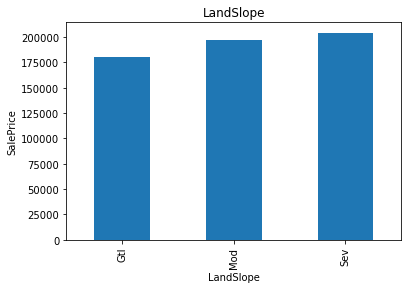

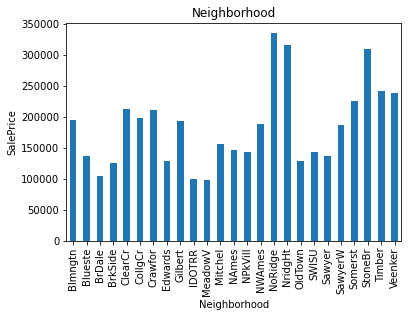

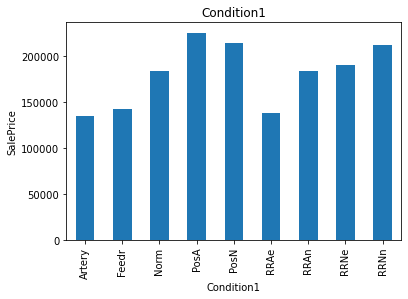

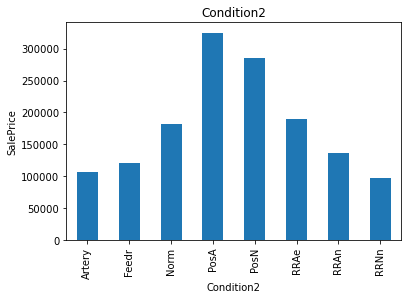

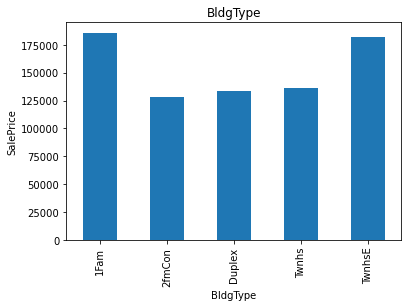

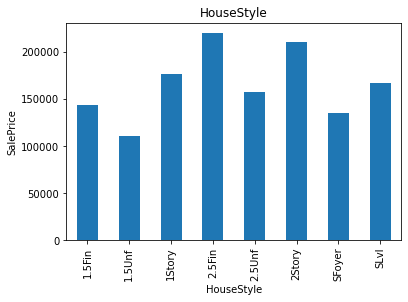

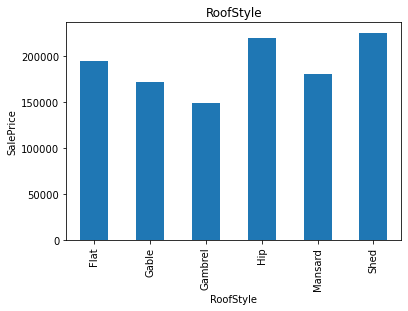

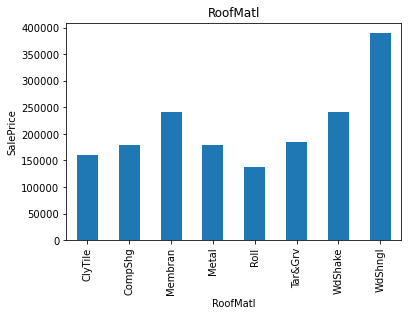

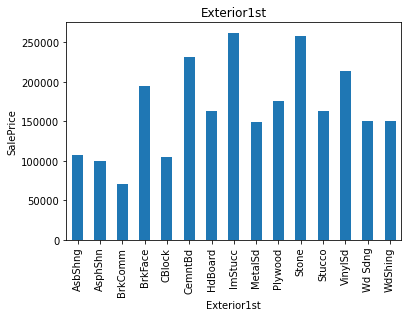

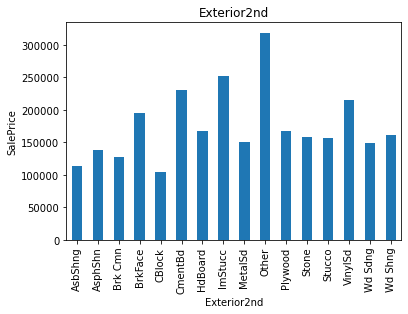

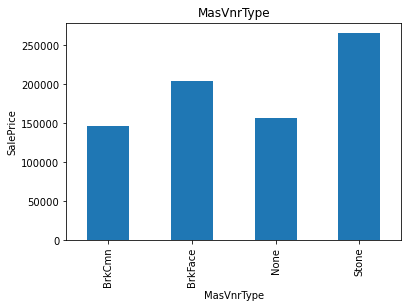

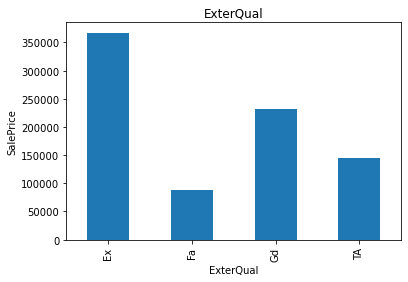

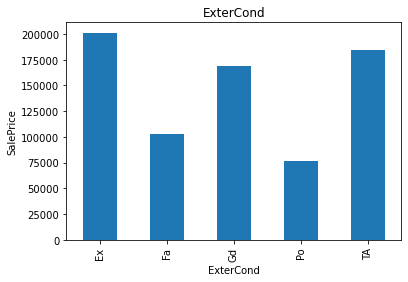

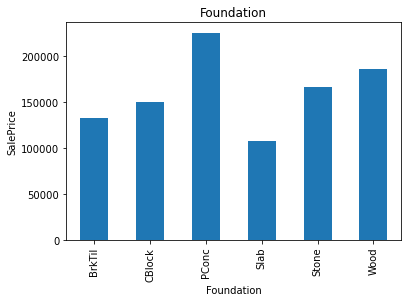

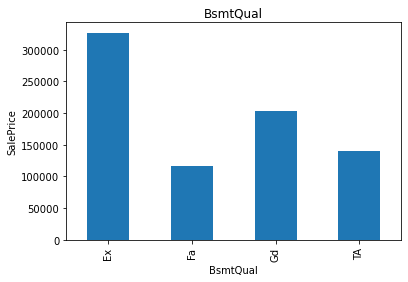

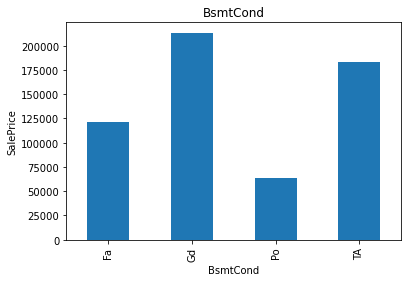

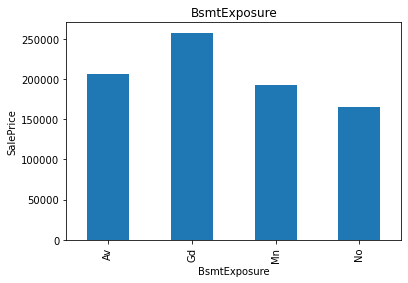

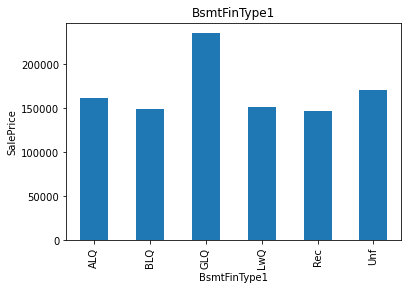

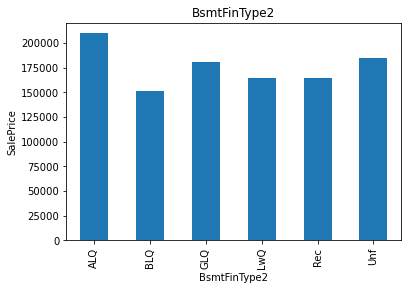

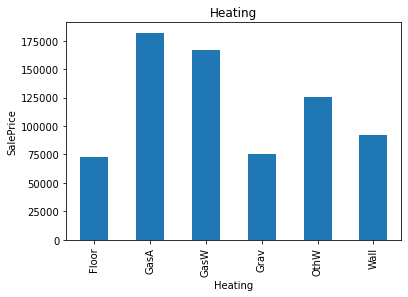

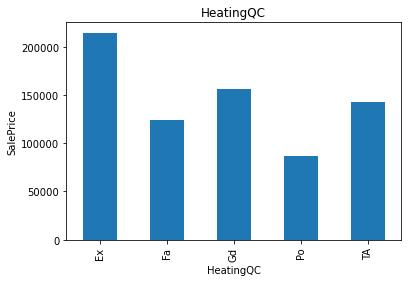

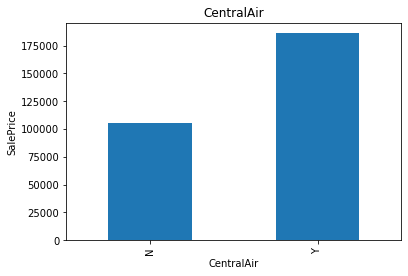

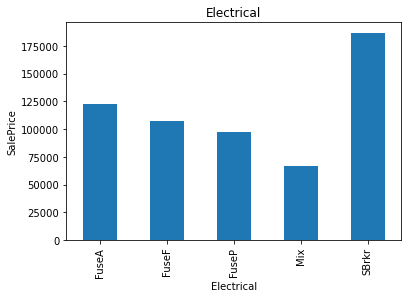

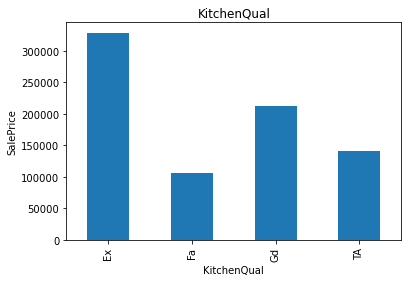

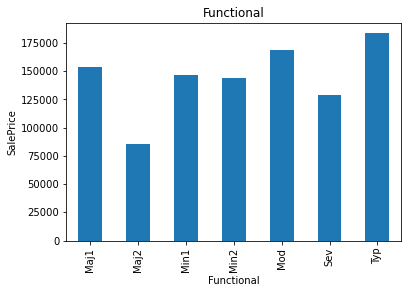

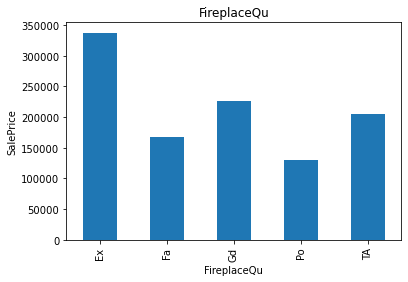

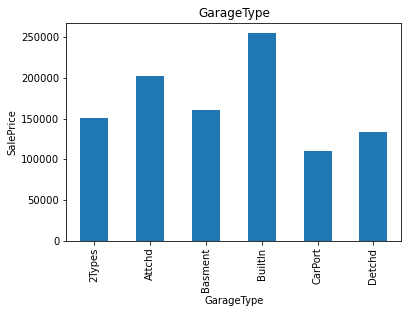

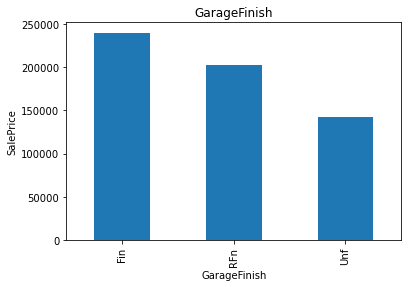

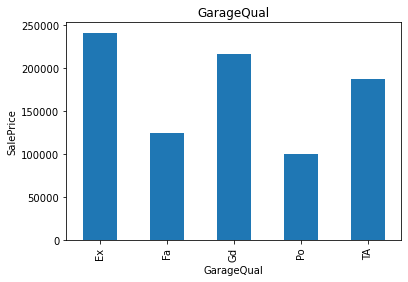

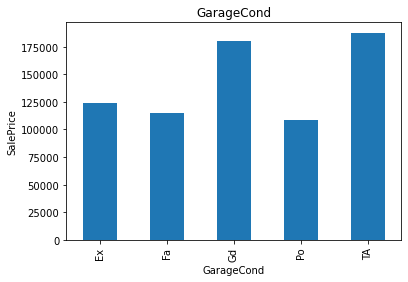

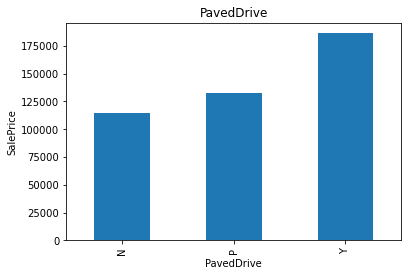

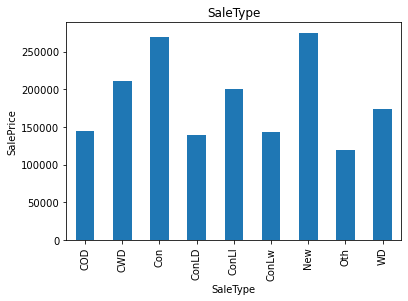

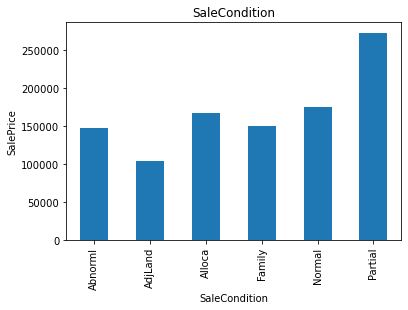

In [114]:
for i in categorical_col:
    df.groupby(i)['SalePrice'].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)
    plt.show()

There are no imbalanced classes

In [115]:
df[numerical_col].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,755000.000000


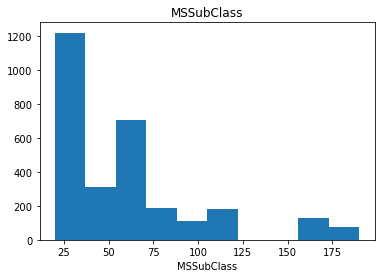

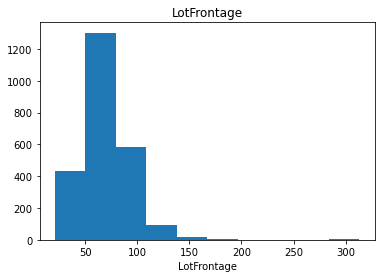

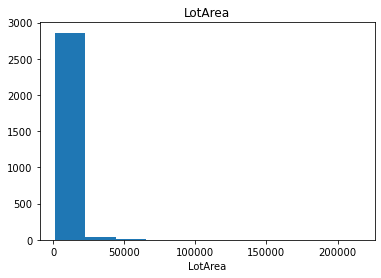

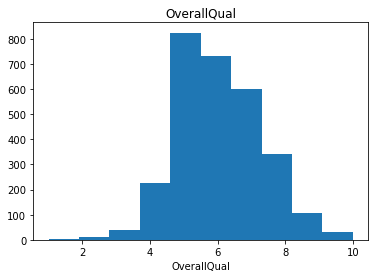

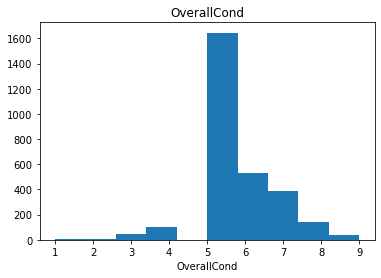

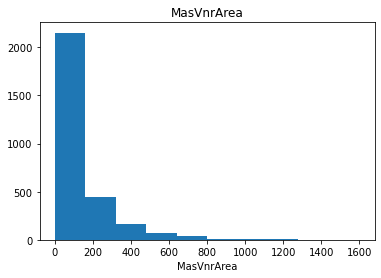

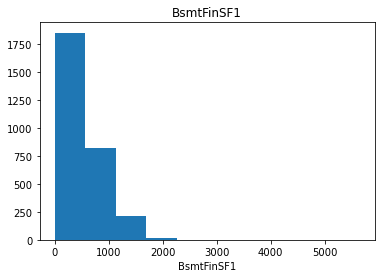

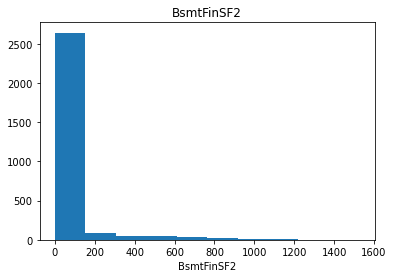

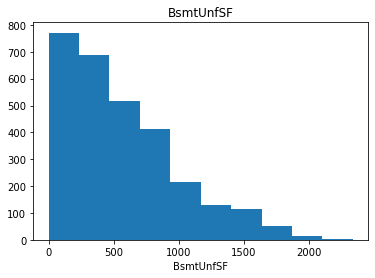

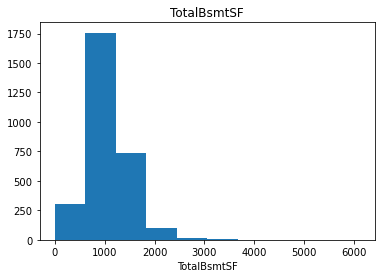

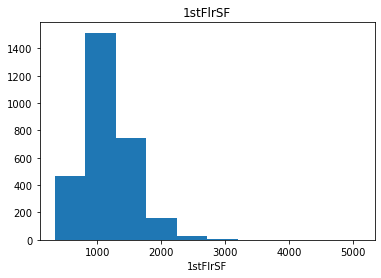

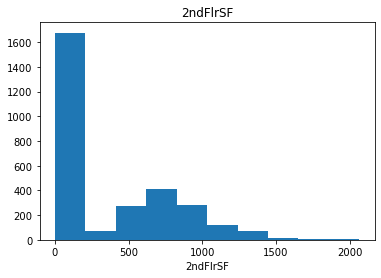

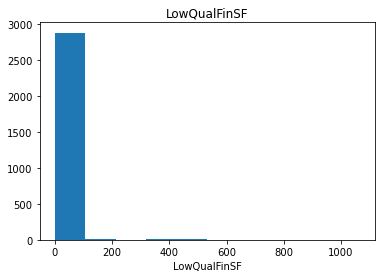

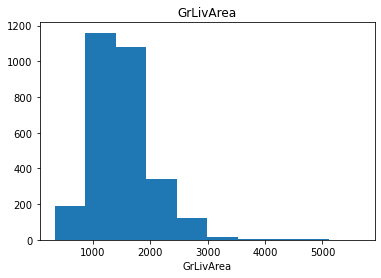

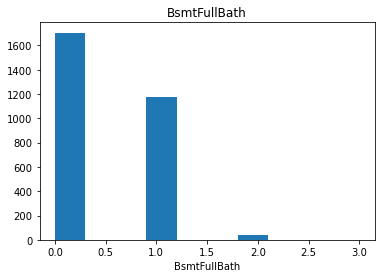

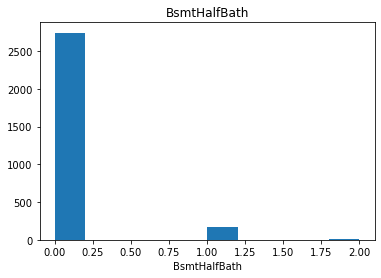

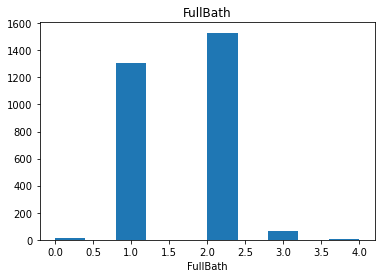

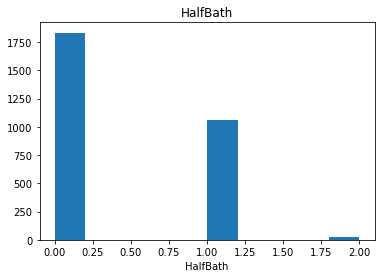

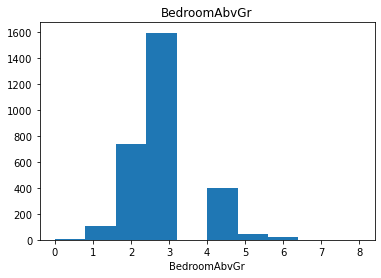

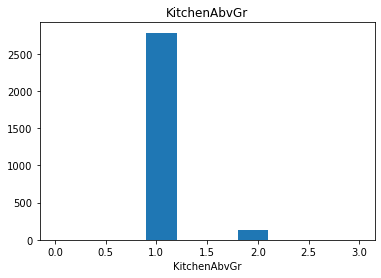

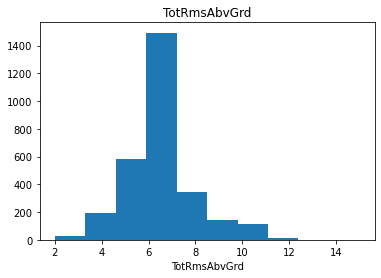

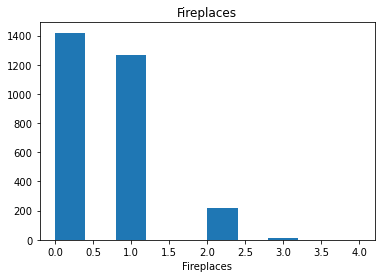

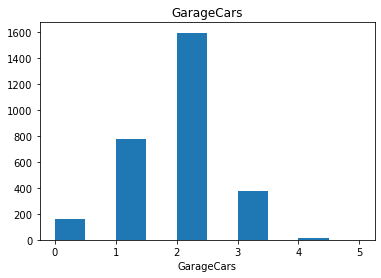

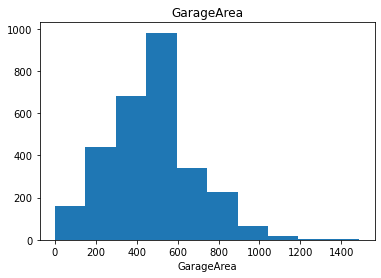

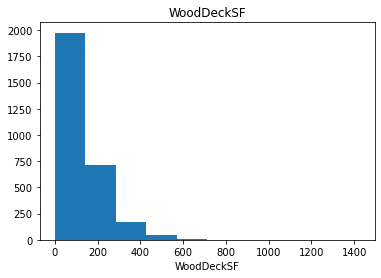

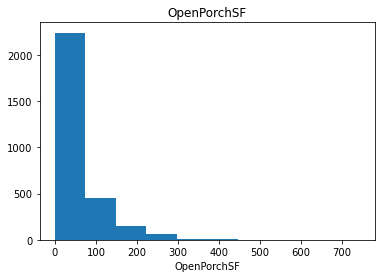

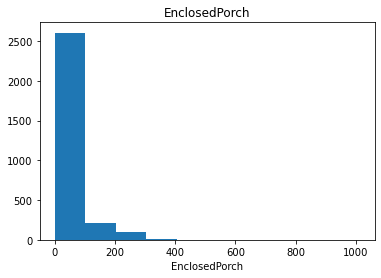

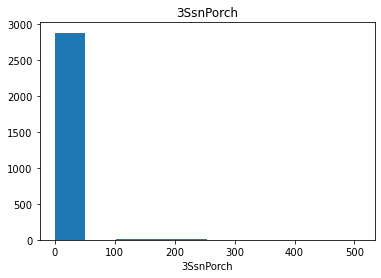

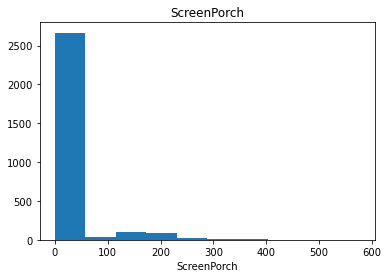

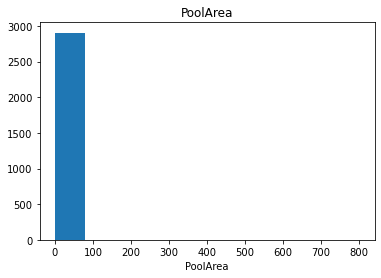

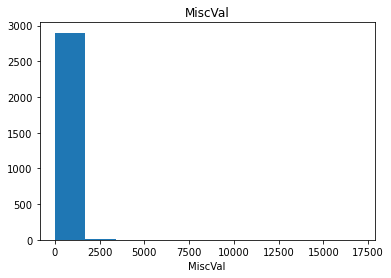

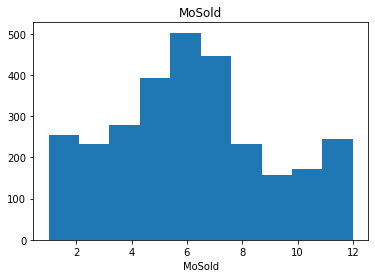

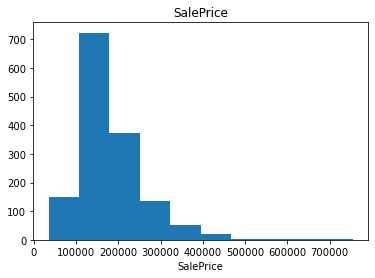

In [116]:
for i in numerical_col:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.title(i)
    plt.show()

LotArea, BsmtFinSF2, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal - imbalanced

In [117]:
df[numerical_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   LotFrontage    2433 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   OverallQual    2919 non-null   int64  
 4   OverallCond    2919 non-null   int64  
 5   MasVnrArea     2896 non-null   float64
 6   BsmtFinSF1     2918 non-null   float64
 7   BsmtFinSF2     2918 non-null   float64
 8   BsmtUnfSF      2918 non-null   float64
 9   TotalBsmtSF    2918 non-null   float64
 10  1stFlrSF       2919 non-null   int64  
 11  2ndFlrSF       2919 non-null   int64  
 12  LowQualFinSF   2919 non-null   int64  
 13  GrLivArea      2919 non-null   int64  
 14  BsmtFullBath   2917 non-null   float64
 15  BsmtHalfBath   2917 non-null   float64
 16  FullBath       2919 non-null   int64  
 17  HalfBath       2919 non-null   int64  
 18  BedroomA

# Feature engineering

In [118]:
df['YearBuilt'].corr(df['GarageYrBlt'])

0.8348123731631015

In [119]:
df.drop(columns='GarageYrBlt', inplace=True)
year_col.remove('GarageYrBlt')

In [120]:
df[year_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YearBuilt     2919 non-null   int64
 1   YearRemodAdd  2919 non-null   int64
 2   YrSold        2919 non-null   int64
dtypes: int64(3)
memory usage: 91.2 KB


### Categorical Features

In [121]:
for i in categorical_col:
    if df[i].isna().any():
        print(i, df[i].isna().sum())

MSZoning 4
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 24
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinType2 80
Electrical 1
KitchenQual 1
Functional 2
FireplaceQu 1420
GarageType 157
GarageFinish 159
GarageQual 159
GarageCond 159
SaleType 1


In most cases where Fireplaces set to 0, FireplaceQu set to NaN. So it must be replaced with new category 'Missing'

In most cases where GarageArea set to 0, other categorical columns related to Garage are set to NaN. So they must be replaced with new category 'Missing'

In most cases where TotalBsmtSF set to 0, other categorical columns related to basement (Bsmt) are set to NaN. So they must be replaced with new category 'Missing'

In [122]:
cond = (df['Fireplaces'] == 0)

df.loc[cond, 'FireplaceQu'] = df.loc[cond, 'FireplaceQu'].fillna('Missing')

In [123]:
df[df.FireplaceQu.isna()][['Fireplaces', 'FireplaceQu']].head(10)

,Fireplaces,FireplaceQu


In [124]:
cond = (df['GarageArea'] == 0)

df.loc[cond, ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = df.loc[cond, ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('Missing')

In [125]:
df[df.GarageFinish.isna()][['GarageArea', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].head(10)

,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
666,360.0,Detchd,NaN,NaN,NaN
1116,NaN,Detchd,NaN,NaN,NaN


In [126]:
cond = (df['TotalBsmtSF'] == 0)

df.loc[cond, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = df.loc[cond, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('Missing')

In [127]:
df[df.BsmtExposure.isna()][['TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].head(50)

,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
948,936.0,Gd,TA,NaN,Unf,Unf
27,1595.0,Gd,TA,NaN,Unf,Unf
660,NaN,NaN,NaN,NaN,NaN,NaN
888,725.0,Gd,TA,NaN,Unf,Unf


In [128]:
cat_withNa = []
for i in categorical_col:
    if df[i].isna().any():
        cat_withNa.append(i)
        print(i, df[i].isna().sum())

MSZoning 4
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 24
BsmtQual 3
BsmtCond 4
BsmtExposure 4
BsmtFinType1 1
BsmtFinType2 2
Electrical 1
KitchenQual 1
Functional 2
GarageFinish 2
GarageQual 2
GarageCond 2
SaleType 1


Other missing categorical features may be replaced with most frequent value in the column

In [129]:
df[cat_withNa]=df[cat_withNa].fillna(df[cat_withNa].mode().iloc[0])

In [130]:
df[categorical_col].isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [131]:
from sklearn.preprocessing import LabelEncoder

In [132]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [133]:
df[categorical_col] = MultiColumnLabelEncoder().fit_transform(df[categorical_col])

In [134]:
df[categorical_col].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,4,2,6,1,0,1,4,2,6,3,1,2,5,5,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,4,1,0,6,1,0,1,4,3,6,5,1,2,5,5,2,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,3,2,6,1,0,1,4,2,6,5,1,2,5,5,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,4,1,4,0,6,1,2,1,4,2,6,2,5,3,5,5,2,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,5,1,2,5,5,2,8,4


### Numerical features

In [135]:
df[numerical_col].isnull().values.any()

True

Text(0.5, 1.0, 'Missing value in the dataset')

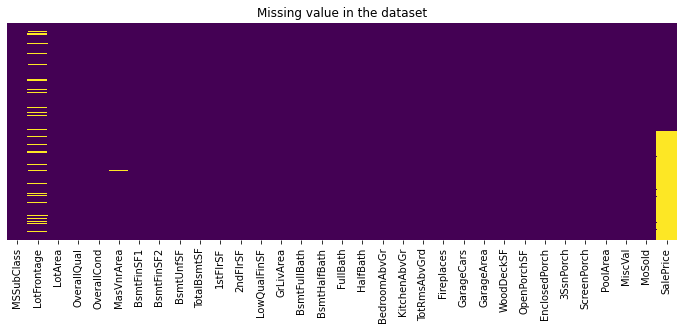

In [136]:
plt.figure(figsize=(12,4))
sns.heatmap(df[numerical_col].isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

For SalePrice it is okay to have half of nan values, because it is target variable

In [137]:
numerical_col.remove('SalePrice')

In [138]:
for i in numerical_col:
    if df[i].isna().any():
        print(i, df[i].isna().sum())

LotFrontage 486
MasVnrArea 23
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageCars 1
GarageArea 1


In [139]:
df[numerical_col].nunique()

MSSubClass         16
LotFrontage       128
LotArea          1951
OverallQual        10
OverallCond         9
MasVnrArea        444
BsmtFinSF1        991
BsmtFinSF2        272
BsmtUnfSF        1135
TotalBsmtSF      1058
1stFlrSF         1083
2ndFlrSF          635
LowQualFinSF       36
GrLivArea        1292
BsmtFullBath        4
BsmtHalfBath        3
FullBath            5
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       14
Fireplaces          5
GarageCars          6
GarageArea        603
WoodDeckSF        379
OpenPorchSF       252
EnclosedPorch     183
3SsnPorch          31
ScreenPorch       121
PoolArea           14
MiscVal            38
MoSold             12
dtype: int64

In [140]:
df[numerical_col].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,60,65.0,8450,7,5,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2
1,20,80.0,9600,6,8,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5
2,60,68.0,11250,7,5,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,9
3,70,60.0,9550,7,5,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,2
4,60,84.0,14260,8,5,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,12


In [141]:
discrete_col = []
continuous_col = []
for i in numerical_col:
    if (df[i].nunique() >= df['3SsnPorch'].nunique() or i == 'PoolArea'): #3SsnPorch and PoolArea have the least unique values among all continuous features
        continuous_col.append(i)
    else:
        discrete_col.append(i)

In [142]:
df[continuous_col]=df[continuous_col].fillna(df[continuous_col].median().iloc[0])

In [143]:
df[discrete_col]=df[discrete_col].fillna(df[discrete_col].mode().iloc[0])

In [144]:
df[numerical_col].isnull().values.any()

False

In [145]:
to_log = []
for i in continuous_col:
    if df[i].min() != 0:
        to_log.append(i)
to_log.append('SalePrice')

In [146]:
to_log

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [147]:
for i in to_log:
    df[i] = np.log(df[i])

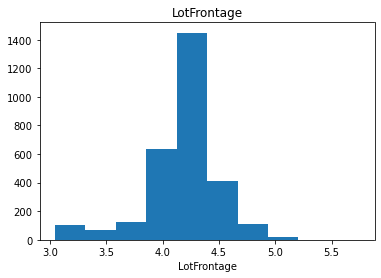

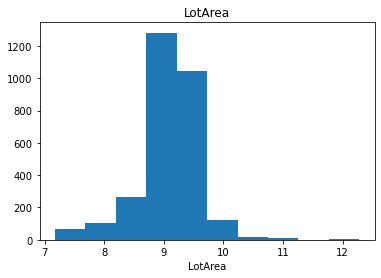

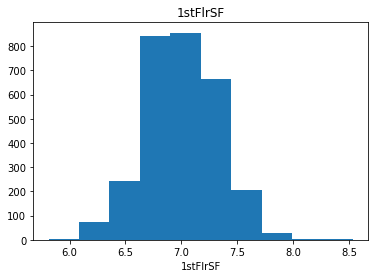

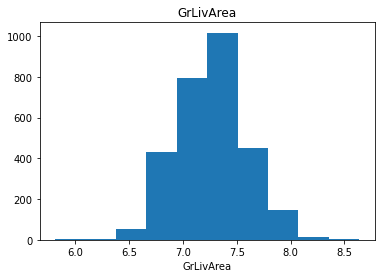

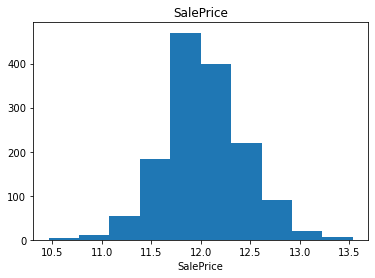

In [148]:
for i in to_log:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.title(i)
    plt.show()

Scaling of continous features

In [149]:
df[continuous_col].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,4.174387,9.041922,196.0,706.0,0.0,150.0,856.0,6.752270,854,0,7.444249,548.0,0,61,0,0,0,0,0
1,4.382027,9.169518,0.0,978.0,0.0,284.0,1262.0,7.140453,0,0,7.140453,460.0,298,0,0,0,0,0,0
2,4.219508,9.328123,162.0,486.0,0.0,434.0,920.0,6.824374,866,0,7.487734,608.0,0,42,0,0,0,0,0
3,4.094345,9.164296,0.0,216.0,0.0,540.0,756.0,6.867974,756,0,7.448334,642.0,0,35,272,0,0,0,0
4,4.430817,9.565214,350.0,655.0,0.0,490.0,1145.0,7.043160,1053,0,7.695303,836.0,192,84,0,0,0,0,0


In [150]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_col] = scaler.fit_transform(df[numerical_col])
df[categorical_col] = scaler.fit_transform(df[categorical_col])
df[year_col] = scaler.fit_transform(df[year_col])

In [151]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,0.75,0.418208,0.366344,1.0,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.949275,0.883333,0.2,0.142857,0.857143,0.866667,0.333333,0.12250,0.666667,1.0,0.4,0.5,1.00,1.00,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.2,0.0,1.0,1.0,0.345385,0.413559,0.0,0.577712,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.461538,1.0,0.00,0.6,0.166667,0.666667,0.4,0.368280,1.0,1.0,1.0,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8,12.247694
1,0.000000,0.75,0.495064,0.391317,1.0,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.555556,0.875,0.753623,0.433333,0.2,0.142857,0.571429,0.533333,0.666667,0.00000,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.2,0.0,1.0,1.0,0.487844,0.000000,0.0,0.470245,0.000000,0.5,0.50,0.0,0.375,0.333333,1.000000,0.307692,1.0,0.25,1.0,0.166667,0.666667,0.4,0.309140,1.0,1.0,1.0,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8,12.109011
2,0.235294,0.75,0.434909,0.422359,1.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.934783,0.866667,0.2,0.142857,0.857143,0.866667,0.333333,0.10125,0.666667,1.0,0.4,0.5,1.00,0.75,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.2,0.0,1.0,1.0,0.371846,0.419370,0.0,0.593095,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.307692,1.0,0.25,1.0,0.166667,0.666667,0.4,0.408602,1.0,1.0,1.0,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.8,12.317167
3,0.294118,0.75,0.388581,0.390295,1.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.311594,0.333333,0.2,0.142857,0.928571,1.000000,0.666667,0.00000,1.000000,1.0,0.0,1.0,0.25,1.00,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.2,0.5,1.0,1.0,0.387847,0.366102,0.0,0.579157,0.333333,0.0,0.25,0.0,0.375,0.333333,0.666667,0.384615,1.0,0.25,0.4,0.833333,1.000000,0.6,0.431452,1.0,1.0,1.0,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.0,11.849398
4,0.235294,0.75,0.513123,0.468761,1.0,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.927536,0.833333,0.2,0.142857,0.857143,0.866667,0.333333,0.21875,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.2,0.0,1.0,1.0,0.452138,0.509927,0.0,0.666523,0.333333,0.0,0.50,0.5,0.500,0.333333,0.666667,0.538462,1.0,0.25,1.0,0.166667,0.666667,0.6,0.561828,1.0,1.0,1.0,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.8,12.429216


In [152]:
# np.exp(df['SalePrice']) ---- return from log initial values

# Feature Selection

In [164]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [225]:
X_test = df.iloc[1460:, :-1]

In [167]:
train = df.iloc[:1460, :]
y_train = train['SalePrice']
X_train = train.drop('SalePrice', axis = 1)

In [170]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=42))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=42))

In [173]:
feature_sel_model.get_support()

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True, False, False, False, False, False, False,  True, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
        True, False, False, False, False, False,  True, False, False,
        True, False,  True,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True])

In [174]:
selected_cols = X_train.columns[feature_sel_model.get_support()]

In [227]:
X_train = X_train[selected_cols]
X_test = X_test[selected_cols]
X_train

,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,SaleCondition
0,1.0,0.0,0.666667,0.949275,0.883333,0.666667,0.5,1.00,0.333333,0.0,1.0,0.345385,0.577712,0.333333,0.666667,0.00,0.166667,0.666667,0.4,0.368280,1.0,0.8
1,1.0,0.0,0.555556,0.753623,0.433333,1.000000,0.5,0.25,0.000000,0.0,1.0,0.487844,0.470245,0.000000,1.000000,0.25,0.166667,0.666667,0.4,0.309140,1.0,0.8
2,0.0,0.0,0.666667,0.934783,0.866667,0.666667,0.5,0.75,0.333333,0.0,1.0,0.371846,0.593095,0.333333,0.666667,0.25,0.166667,0.666667,0.4,0.408602,1.0,0.8
3,0.0,0.0,0.666667,0.311594,0.333333,1.000000,1.0,1.00,0.000000,0.5,1.0,0.387847,0.579157,0.333333,0.666667,0.25,0.833333,1.000000,0.6,0.431452,1.0,0.0
4,0.0,0.0,0.777778,0.927536,0.833333,0.666667,0.5,0.00,0.333333,0.0,1.0,0.452138,0.666523,0.333333,0.666667,0.25,0.166667,0.666667,0.6,0.561828,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,0.0,0.555556,0.920290,0.833333,1.000000,0.5,1.00,1.000000,0.0,1.0,0.384779,0.564433,0.000000,1.000000,0.25,0.166667,0.666667,0.4,0.309140,1.0,0.8
1456,1.0,0.0,0.555556,0.768116,0.633333,1.000000,0.5,1.00,0.000000,1.0,1.0,0.669980,0.645810,0.333333,1.000000,0.50,0.166667,1.000000,0.4,0.336022,1.0,0.8
1457,1.0,0.0,0.666667,0.500000,0.933333,0.000000,1.0,1.00,0.333333,0.0,1.0,0.465668,0.688669,0.000000,0.666667,0.50,0.166667,0.666667,0.2,0.169355,1.0,0.8
1458,1.0,0.0,0.444444,0.565217,0.766667,1.000000,1.0,0.75,0.333333,0.5,1.0,0.430010,0.414497,0.333333,0.666667,0.00,0.166667,1.000000,0.2,0.161290,1.0,0.8


# Model

In [180]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection

In [181]:
grad_boost = GradientBoostingRegressor(random_state=42)
grad_boost.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [190]:
parameters_grid = {
    'n_estimators' : np.arange(10,35, 5),
    'loss' : ['ls', 'lad', 'huber', 'quantile'],
    'learning_rate' : np.linspace(0.0001, 0.1, num = 5),
    'max_depth' : np.array([3, 5, 7]),
}

In [191]:
cv = model_selection.ShuffleSplit(n_splits=10, test_size = 0.2, random_state = 0)

In [192]:
grid_cv = model_selection.GridSearchCV(grad_boost, parameters_grid, cv = cv)

In [193]:
%%time
grid_cv.fit(X_train, y_train)

Wall time: 9min 16s


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': array([0.0001  , 0.025075, 0.05005 , 0.075025, 0.1     ]),
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_depth': array([3, 5, 7]),
                         'n_estimators': array([10, 15, 20, 25, 30])})

In [228]:
grid_cv.best_params_

{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 5, 'n_estimators': 30}

In [229]:
y_pred = grid_cv.predict(X_test)

In [230]:
y_pred = np.exp(y_pred)

In [236]:
y_pred

array([124529.75049788, 146459.90441738, 177354.74063995, ...,
       147363.59800397, 116997.98509146, 227578.64832267])

In [232]:
test = pd.read_csv("test.csv")

In [233]:
test['SalePrice'] = y_pred

In [237]:
answer = test[['Id', 'SalePrice']]

In [238]:
answer.to_csv("answer.csv", index=False)